<a href="https://colab.research.google.com/github/erafferty98/friendly-spoon/blob/master/DSTACWK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#clean data
data = pd.read_csv('openpowerlifting.csv')
print(data.shape)
data = data.dropna(axis=0, subset=['TotalKg'])
print(data.shape)
data = data.dropna(axis=0, subset=['BodyweightKg'])
print(data.shape)
data = data.dropna(axis=0, subset=['Best3DeadliftKg'])
data = data[data['Best3DeadliftKg'] <= 0]
print(data.shape)
data = data.dropna(axis=0, subset=['IPFPoints'])
print(data.shape)
X = data[['TotalKg','BodyweightKg','Best3DeadliftKg']] # Specify dimensions for analysis
Y = data['IPFPoints'] # Specify Y as binary 'target' variable

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1423354, 37)
(1313184, 37)
(1304407, 37)
(1060491, 37)
(1031495, 37)


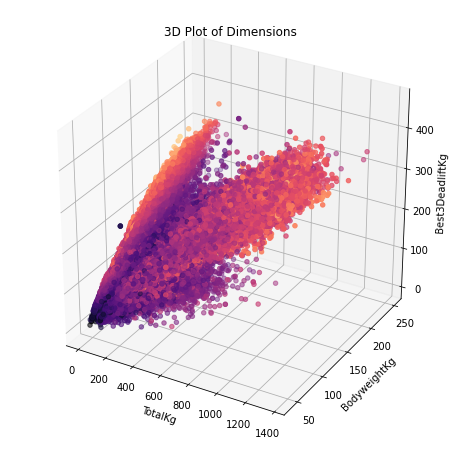

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualise predictor data using matplotlib scatter plots
import matplotlib.pyplot as plt
x = X['TotalKg']
y = X['BodyweightKg']
z = X['Best3DeadliftKg']
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.set_title("3D Plot of Dimensions")
ax.set_xlabel("TotalKg")
ax.set_ylabel("BodyweightKg")
ax.set_zlabel("Best3DeadliftKg")
fig = plt.figure()
p = ax.scatter(x, y, z, c=Y, cmap=plt.cm.magma)
plt.show()

Text(0, 0.5, 'IPF Points')

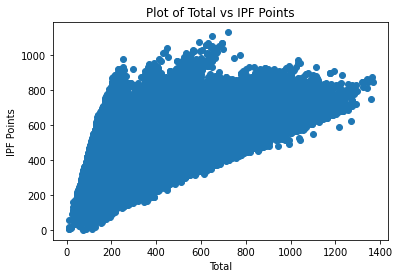

In [ ]:
import matplotlib.pyplot as plt
x = X['TotalKg']
y = X['BodyweightKg']
z = X['Best3DeadliftKg']

fig = plt.figure()
plt.scatter(x, Y)
plt.title("Plot of Total vs IPF Points")
plt.xlabel("Total")
plt.ylabel("IPF Points")

Text(0, 0.5, 'IPF Points')

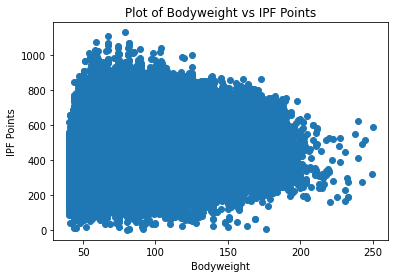

In [ ]:
fig = plt.figure()
plt.scatter(y, Y)
plt.title("Plot of Bodyweight vs IPF Points")
plt.xlabel("Bodyweight")
plt.ylabel("IPF Points")

Text(0, 0.5, 'IPF Points')

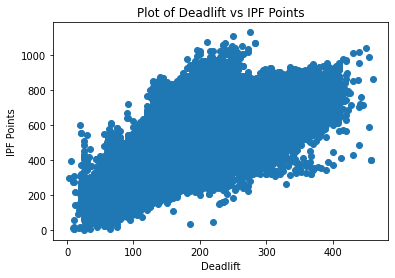

In [ ]:
fig = plt.figure()
plt.scatter(z, Y)
plt.title("Plot of Deadlift vs IPF Points")
plt.xlabel("Deadlift")
plt.ylabel("IPF Points")

PCA Components: [[ 0.63349712  0.41410684  0.65360303]
 [-0.31583693  0.90954365 -0.27014327]
 [ 0.70634866  0.03529699 -0.70698351]]


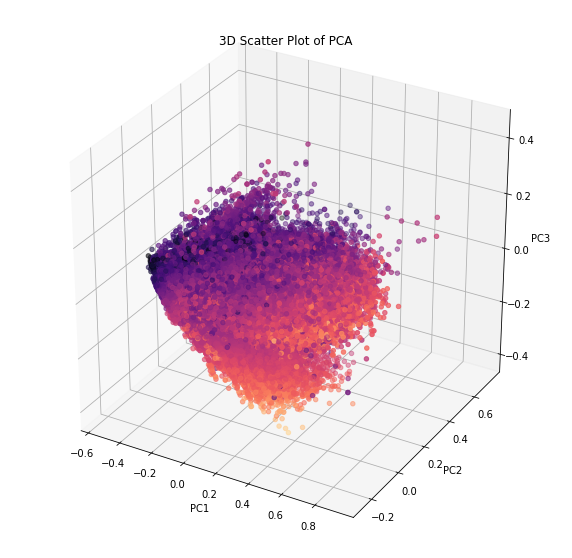

Explained Variance: [0.81384635 0.13899188 0.04716178]


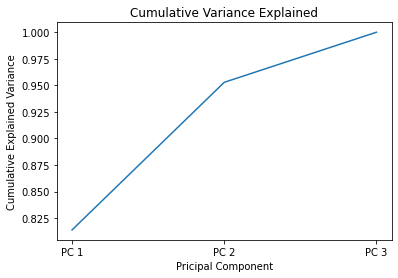

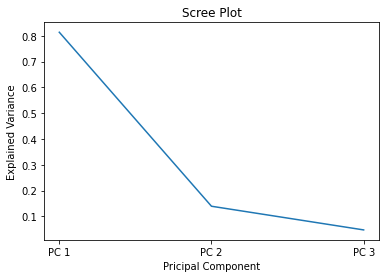

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Normalise data before PCA
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)

# Perform PCA.
fit = PCA(n_components=3)
X_PC_scaled = fit.fit_transform(X_scaled)
# Print PCA Components
print("PCA Components: %s" % fit.components_)


# Plot scatter plot of output
x = X_PC_scaled[:,0]
y = X_PC_scaled[:,1]
z = X_PC_scaled[:,2]
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_title("3D Scatter Plot of PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
p = ax.scatter(x, y, z, c=Y, cmap=plt.cm.magma)
plt.show()


# Examine variance explained
print("Explained Variance: %s" % fit.explained_variance_ratio_)
var_explained_scaled = fit.explained_variance_ratio_ # Gives proportion of variance explained
plt.plot(var_explained_scaled.cumsum()) # Plots cumulative variance explained
plt.xlabel('Pricipal Component')
plt.xticks(np.arange(0,3,step=1),['PC 1','PC 2', 'PC 3']) # Adds correct PC Labels
plt.ylabel('Cumulative Explained Variance')
plt.title("Cumulative Variance Explained")
plt.show()

#Scree plot
plt.plot(var_explained_scaled)
plt.xlabel('Pricipal Component')
plt.xticks(np.arange(0,3,step=1),['PC1','PC2', 'PC3']) # Adds correct PC Labels
plt.ylabel('Explained Variance')
plt.title("Scree Plot")
plt.show()